In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import os
for dirname, _, filenames in os.walk('/content/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/bus.jpg
/content/Cars.mp4
/content/Bus_front.xml
/content/cars.xml
/content/Cars.mp4.zip
/content/.config/config_sentinel
/content/.config/.last_update_check.json
/content/.config/active_config
/content/.config/hidden_gcloud_config_universe_descriptor_data_cache_configs.db
/content/.config/.last_opt_in_prompt.yaml
/content/.config/.last_survey_prompt.yaml
/content/.config/default_configs.db
/content/.config/gce
/content/.config/configurations/config_default
/content/.config/logs/2025.01.06/14.18.24.135998.log
/content/.config/logs/2025.01.06/14.18.44.642842.log
/content/.config/logs/2025.01.06/14.18.56.278950.log
/content/.config/logs/2025.01.06/14.19.07.941824.log
/content/.config/logs/2025.01.06/14.19.08.582243.log
/content/.config/logs/2025.01.06/14.18.55.307549.log
/content/sample_data/anscombe.json
/content/sample_data/README.md
/content/sample_data/mnist_train_small.csv
/content/sample_data/california_housing_test.csv
/content/sample_data/mnist_test.csv
/content/sample_d

In [3]:
# Import libraries
from PIL import Image
import cv2
import sys
import numpy as np
import requests

Now, we will fetch the image from the internet that we will be working on. We will then resize the image and convert it into a numpy array.



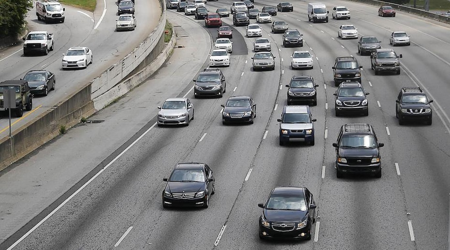

In [5]:
# Reading image from url
image = Image.open('/content/cars.png')
image = image.resize((450, 250))
image_arr = np.array(image)
image

In [ ]:
#Now in oreder to get better output, we will perform some transformations on the image.

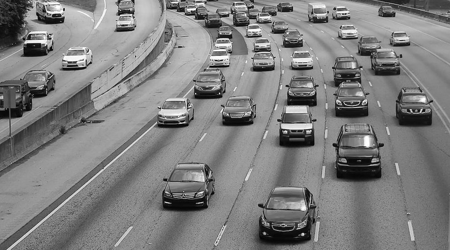

In [6]:
grey = cv2.cvtColor(image_arr, cv2.COLOR_BGR2GRAY)
Image.fromarray(grey)

Next, we will apply GaussianBlur to remove the noise from the image.

Instead of a box filter consisting of equal filter coefficients, a Gaussian kernel is used.

It is done with the function, cv2.GaussianBlur().

We should specify the width and height of the kernel which should be positive and odd.

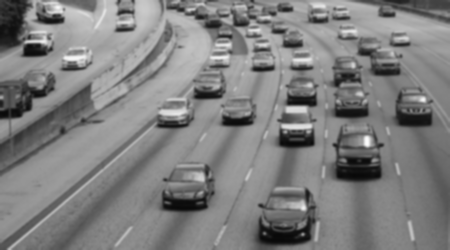

In [7]:
blur = cv2.GaussianBlur(grey,(5,5),0)
Image.fromarray(blur)

Here we will dilate image.

It is just opposite of erosion.

Here, a pixel element is '1' if atleast one pixel under. the kernel is '1'.

So it increases the white region in the image or size of foreground object increases.

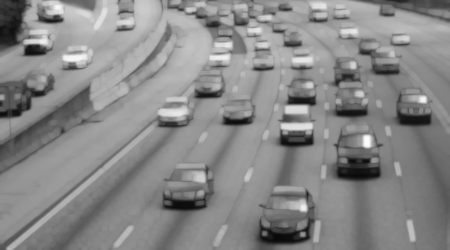

In [8]:
dilated = cv2.dilate(blur, np.ones((3,3)))
Image.fromarray(dilated)

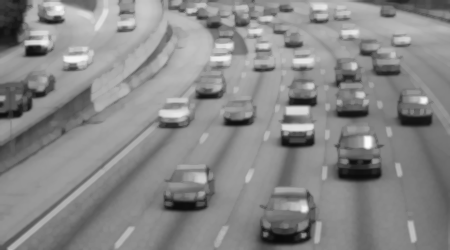

In [9]:
kernle = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2,2))
closing = cv2.morphologyEx(dilated, cv2.MORPH_CLOSE, kernle)
Image.fromarray(closing)

In [11]:
car_cascade_src = '/content/cars.xml'
car_cascade = cv2.CascadeClassifier(car_cascade_src)
cars = car_cascade.detectMultiScale(closing, 1.1, 1)

22  cars found 


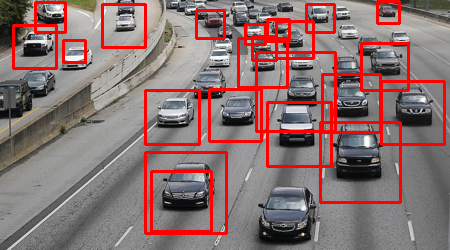

In [12]:
cnt = 0
for (x,y,w,h) in cars:
    cv2.rectangle(image_arr, (x,y),(x+w,y+h),(255,0,0),2)
    cnt += 1
print(cnt, " cars found ")
Image.fromarray(image_arr)